## Word2Vec은 무엇인가?! 
Word2Vec은 문장 내부의 단어를 벡터로 변환하는 도구입니다. 단어의 연결을 기반으로 단어의 연관성을 벡터로 만들어줍니다.
이를 활용해서 단어의 의미를 파악할수있습니다.

## Gensim의 Word2Vec 모델에 '토지'문서를 학습시켜보자
Gensim은 유명한 자연어처리 라이브러리중 하나입니다. 많은 기능이 있지만, Gensimd의 Word2Vec기능을 살펴보도록 하겠습니다. 

만일 gensim이 깔려있지않다면,
pip install gensim으로 설치를 진행합니다.

In [5]:
import warnings
warnings.filterwarnings(action='ignore')#, category=UserWarning, module='gensim')
import codecs 
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from gensim.models import word2vec

In [6]:
#1. 우선 파일을 읽고 텍스트만 뽑아보자
fp = codecs.open('toji.txt', 'r', encoding='utf-16')
soup = BeautifulSoup(fp, 'html.parser')
body = soup.select_one('body')
text = body.getText()
print(text[:300])


제 4 편 인실(仁實)의 자리
4장 장례식 날 밤
사건이 난 뒤 열흘이 지났으나 경찰은 범인의 흔적조차 찾아내질 못하였다. 온통 팽팽한 긴장 속에서 하마 어디서 쾅! 하고 터질지 모르는 소리를 초조하고 안타까운 마음으로 기다리고 있던 이 도시의 사람들, 그러나 열흘을 넘기면서 긴장은 풀리기 시작했고 사람들은 즐거움에 가슴이 뿌듯해져갔다. 어디서나 그 사건은 화제가 되었다. 모르는 사람끼리 눈과 눈이 마주치면 눈으로 이야기하였고 귓속말로 몸짓으로
'꼭꼭 숨어라! 머리카락 보인다! 꼭꼭 숨어라!'
들리지 않는 함성은 차츰차츰 도시를 


In [7]:
#2. 텍스트를 한줄씩 분할하자. 
twitter = Twitter()
results = [ ]
lines = text.split('\n')
print(lines[:5])

['', '제 4 편 인실(仁實)의 자리', '4장 장례식 날 밤', '사건이 난 뒤 열흘이 지났으나 경찰은 범인의 흔적조차 찾아내질 못하였다. 온통 팽팽한 긴장 속에서 하마 어디서 쾅! 하고 터질지 모르는 소리를 초조하고 안타까운 마음으로 기다리고 있던 이 도시의 사람들, 그러나 열흘을 넘기면서 긴장은 풀리기 시작했고 사람들은 즐거움에 가슴이 뿌듯해져갔다. 어디서나 그 사건은 화제가 되었다. 모르는 사람끼리 눈과 눈이 마주치면 눈으로 이야기하였고 귓속말로 몸짓으로', "'꼭꼭 숨어라! 머리카락 보인다! 꼭꼭 숨어라!'"]


In [8]:
#3. 텍스트의 명사, 동사, 형사만 뽑아보자
for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    #print(rl)

In [9]:
#4. 파일로 출력해서 결과 저장
waktai_file = 'toji.wakati'
with open(waktai_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))

In [10]:
#5. word2vec 모델에 방금 정제한 텍스트를 학습시켜보자
data = word2vec.LineSentence(waktai_file)
model = word2vec.Word2Vec( data,
                         size=200, window=10, hs=1, min_count=2, sg=1)
model.save('toji.model')
print("ok")

ok


## '토지'문서를 학습시킨 Word2Vec 모델을 사용해보자

In [20]:
from gensim.models import word2vec
import matplotlib.pyplot as plt # 시각화를 위해 matplotlib과 seaborn을 사용한다.
import seaborn as sns 
import pandas as pd 

# 한글 깨짐을 방지하기 위해
import matplotlib
import matplotlib.font_manager as fm

#fm.get_fontconfig_fonts()
#import matplotlib.font_manager

#for i, x in enumerate(matplotlib.font_manager.fontManager.ttflist):
#    print(i, x, type(x) , x.name)   # x.name  == font name (family name)
#    if i == 100: break   # 10개만 출력하기

matplotlib.rc('font', family='Godo M')


%matplotlib inline 

model = word2vec.Word2Vec.load('toji.model')

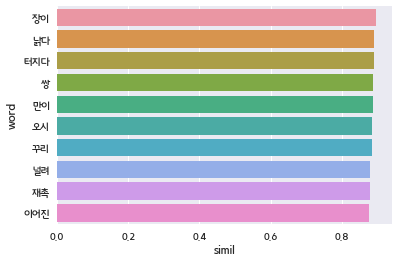

In [25]:
# 단어간 유사도를 알아보기.
word_name = '개'
most_sim = ""

most_sim = pd.DataFrame(model.most_similar(positive=[word_name]), columns=['word', 'simil'])
sns.barplot(data=most_sim, x="simil", y="word")

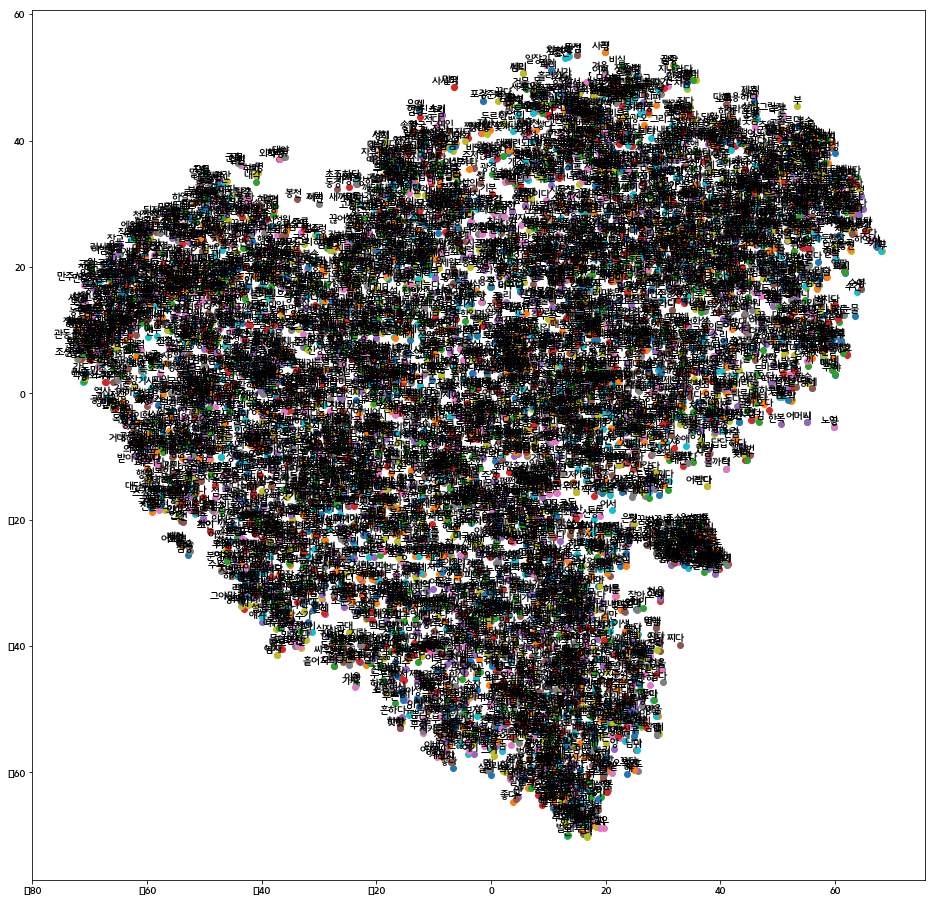

In [13]:
# 2차원 좌표 차원에서 시각화해보자.
# 매우 느림
#from sklearn.manifold import TSNE

#def tsne_plot(model):
#    "Creates and TSNE model and plots it"
#    labels = []
#    tokens = []

#    for word in model.wv.vocab:
#        tokens.append(model[word])
#        labels.append(word)
    
#    tsne_model = TSNE()
#    new_values = tsne_model.fit_transform(tokens)

#    x = []
#    y = []
#    for value in new_values:
#        x.append(value[0])
#        y.append(value[1])
        
#    plt.figure(figsize=(16, 16)) 
#    for i in range(len(x)):
#        plt.scatter(x[i],y[i])
#        plt.annotate(labels[i],
#                     xy=(x[i], y[i]),
#                     xytext=(5, 2),
#                     textcoords='offset points',
#                     ha='right',
#                     va='bottom')
#    plt.show()
#tsne_plot(model)

## 위키피디아 데이터로 모델 학습

### 데이터 수집
1. 우선 한국어 위키 덤프를 다운 받는다(https://dumps.wikimedia.org/kowiki/

2. gem install wp2txt

3. bzip2 -d kowiki*.bz2

4. wp2txt --input-file ./kowiki-latest-pages-articles.xml

5. cat kowiki-latest-pages-articles-* > wiki.txt

### 데이터 정제

In [3]:
import codecs 
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from gensim.models import word2vec

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
# 파일 열기
readFp= codecs.open('wiki.txt', 'r', encoding='utf-8')
wakati_file = 'wiki.wakati'
writeFp = open(wakati_file, 'w', encoding='utf-8')

In [ ]:
# 형태소 분석
twitter = Twitter()
i = 0
while True:
    line = readFp.readline()
    if not line: break
    if i % 20000 == 0:
        print("current - " + str(i))
    i += 1
    malist = twitter.pos(line, norm=True, stem=True)
    r=[]
    for word in malist:
        if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
            writeFp.write(word[0] + ' ')
writeFp.close()